# Project Group : 5   
# Project title : REGRESSION TO PREDICT THE CO2 EMISSIONS (g/km) OF A VEHICLE

Reference:
- https://pandas.pydata.org/

In this project, we will be working on a dataset that was taken and compiled from Canada Government official open data website. 
This dataset contains official CO2 emissions data for various car of different features over the period of 2014 to 2020.
We will be implementing a linear regression technique to create a model to predict the CO2 emissions of a car.

The followings are the steps performed to create and test such a model:
- import the necessary libraries
- load the data
- analyse the data
- visualize the data and perform exploratory data analsys (EDA)
- create a model and split the model into train and test datasets
- test the model

## Library import and data loading

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# So that the plot will be saved within the jupyter notebook
%matplotlib inline

# Load the Boston housing dataset
df = pd.read_csv('CO2 Emissions_Canada.csv')

print("This car CO2 emissions dataset has {} data points {} variables each." .format(*df.shape))

This car CO2 emissions dataset has 7385 data points 12 variables each.


## Data Cleaning, Preparation and Wrangling
Have a peek of the data

In [2]:
df.head(5) # to show the first 5 rows

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. The abbreviations are listed below. The same can be found in the Data Description sheet.
1. Model
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

2. Transmission
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = manual

3. Fuel type :
- X = Regular Gasoline
- Z = Premium Gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas

4. Fuel consumption :
- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

#### Having a look at the attributes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Exploratory Data Analysis (EDA) and Visualization

Objective of EDA :
- To detect any missing values, outliers and anamolies with the data set.
- To gain maximum insight into the data set
- To uncover underlying structure.
- To check the distribution of the data.
- Identify the important variables.

We are going to analyse and visualize the data to have a better understand the relationships between different variables. 

In [4]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

We can see that there are 7 numerical variables and 5 categorical variables in the dataset. But, there is no missing values. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

### Analysing categorical data

In [5]:
print(df["Make"].nunique())
print(df["Make"].unique())

42
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


There are total 42 types of car brand.

In [6]:
print(df["Model"].nunique())
print(df["Model"].unique())

2053
['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


There are total 2053 unique car model which we can not use for analysis. So we can drop this column.

In [7]:
df.drop("Model", axis='columns', inplace=True)

In [8]:
print(df["Vehicle Class"].nunique())
print(df["Vehicle Class"].unique())

16
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


There are total 16 types of vehicle class.

In [9]:
print(df["Transmission"].nunique())
print(df["Transmission"].unique())

27
['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


The 27 types of transmissions. We will map them into 5 different transmissions based on the abbreviation in data description sheet without taking the number of gears into account as we assume they doesnot affect CO2 emissions.

In [10]:
# Mapping similar labels into a single label for Transmission column
df["Transmission"] = np.where(df["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["M5", "M6", "M7"]), "Manual", df["Transmission"])
df["Transmission"].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [11]:
print(df["Fuel Type"].nunique())
print(df["Fuel Type"].unique())

5
['Z' 'D' 'X' 'E' 'N']


The 5 types of fuel types will be renamed based on the abbreviation in data description sheet so that it has some meaningful interpretation.

In [12]:
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])
df.head(5)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


#### Variation in CO2 Emissions of different Categorical Features

Text(0, 0.5, 'CO2 Emissions(g/km)')

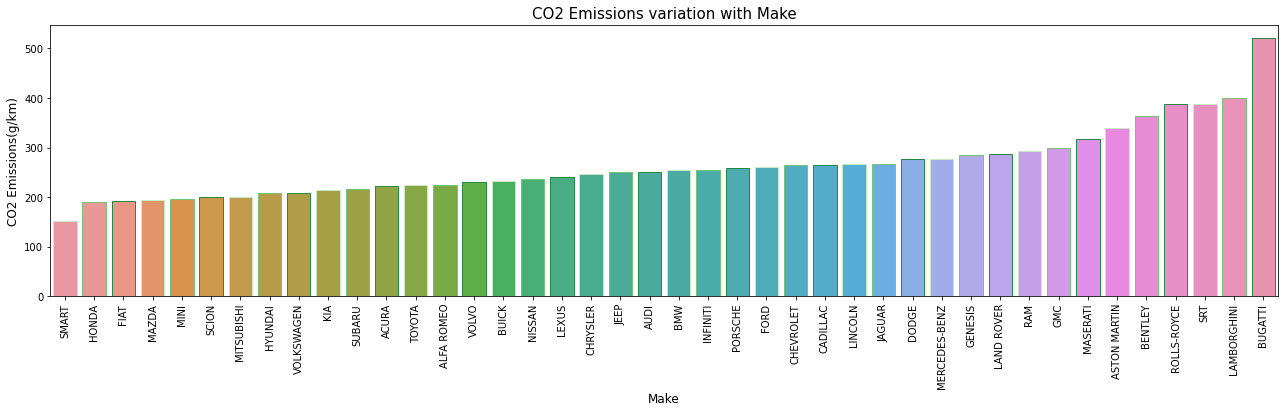

In [13]:
CO2_make = df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Make",y="CO2 Emissions(g/km)",data = CO2_make, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions variation with Make', fontsize=15)
plt.xlabel('Make', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

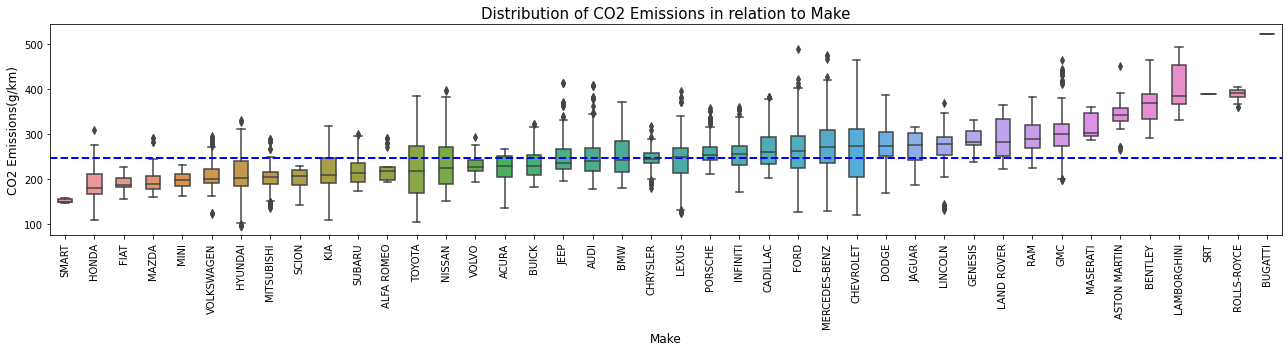

In [14]:
plt.figure(figsize=(18,5))
order = df.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='b',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

From the above bar graph and box plot, we can see the costly make cars are emmitting a lot of carbon emissions and brands like Honda and Smart are least carbon emitting vehicles. The blue line signify the sample mean of CO2 emissions, almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.

Text(0, 0.5, 'CO2 Emissions(g/km)')

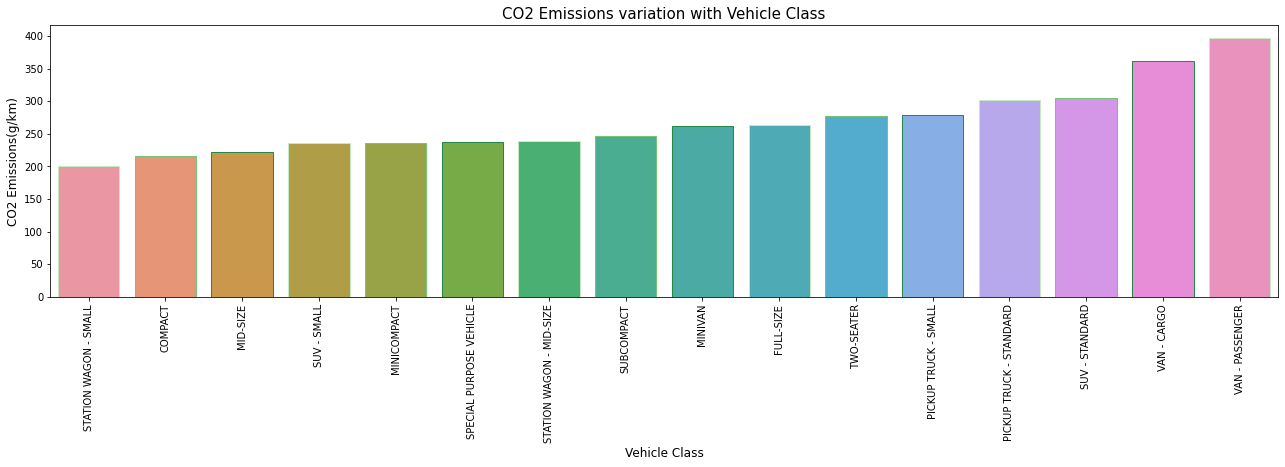

In [15]:
CO2_class = df.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values(ascending=True).reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Vehicle Class",y="CO2 Emissions(g/km)",data = CO2_class, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

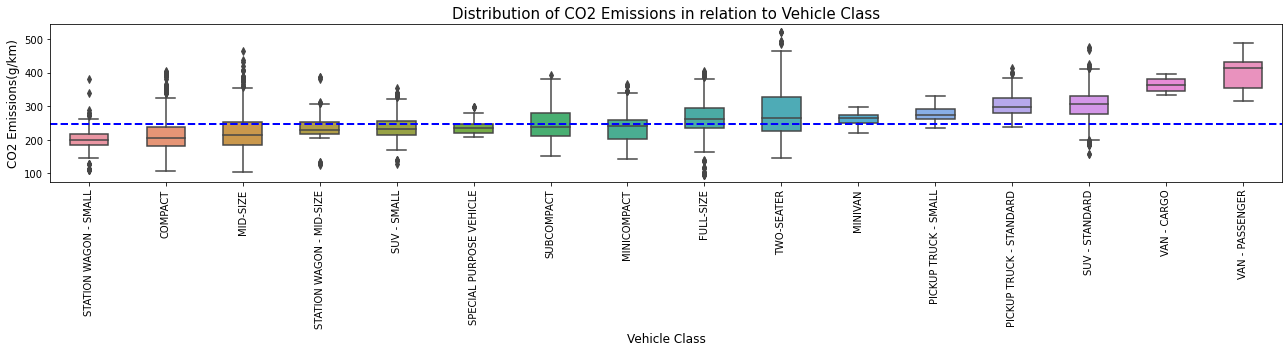

In [16]:
plt.figure(figsize=(18,5))
order = df.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='b',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

From the above bar graph and box plot, we can see VAN-Passenger vehicles are the top most carbon emitting type of vehicle and Station Wagon-Small is the least Carbon emitting type of vehicle. There are 8 types of vehicle class out of 16 which has a median CO2 emissions less than sample median of CO2 emissions and the other 8 has a higher median.

Text(0, 0.5, 'CO2 Emissions(g/km)')

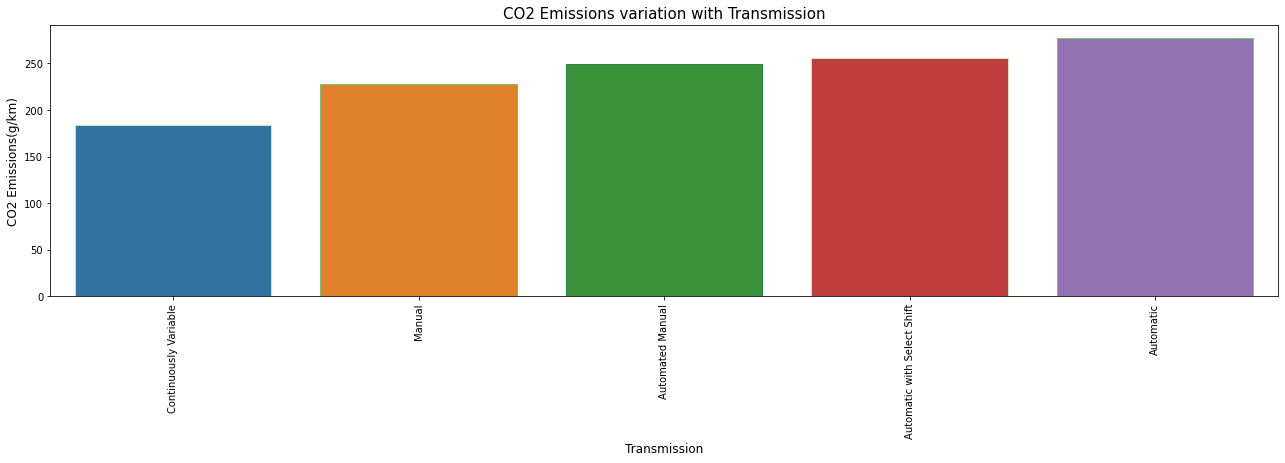

In [17]:
CO2_transmission = df.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values(ascending=True).reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Transmission",y="CO2 Emissions(g/km)",data = CO2_transmission, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('Transmission', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

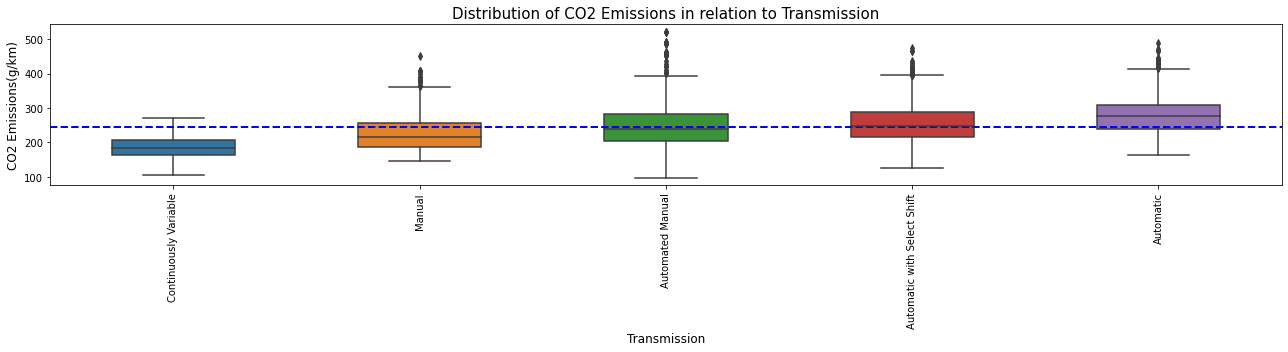

In [18]:
plt.figure(figsize=(18,5))
order = df.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='b',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

From the above bar graph and box plot, we can see that vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions. Median CO2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median CO2 emissions.

Text(0, 0.5, 'CO2 Emissions(g/km)')

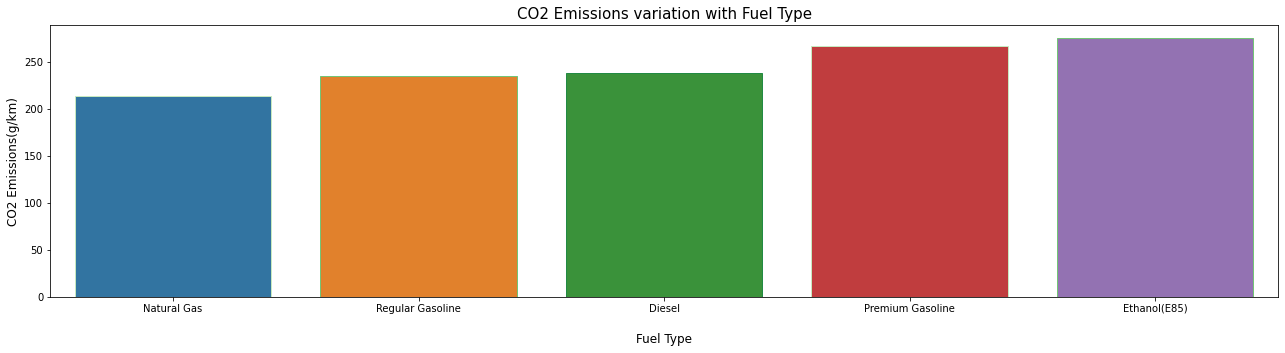

In [19]:
CO2_fuel_type = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values(ascending=True).reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Fuel Type",y="CO2 Emissions(g/km)",data = CO2_fuel_type, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

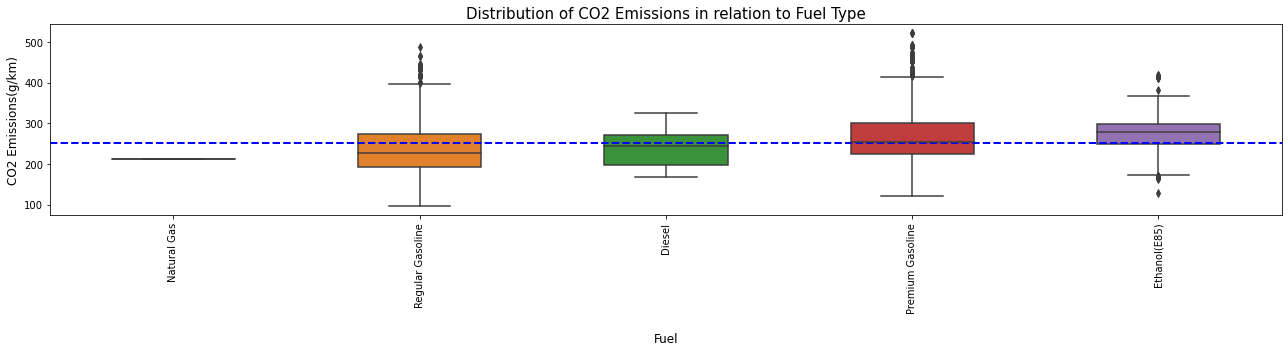

In [20]:
plt.figure(figsize=(18,5))
order = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].mean(),color='b',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

From the above bar chart and box plot, we can see that cars running on Ethanol(E85) has the highest CO2 emissions with almost all the values hisger than the sample median CO2 emissions, cars that are using natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Cars with Regular Gasoline also has the lowest CO2 emissions with almost 75% values less than sample median. The median CO2 emissions of fuel type Premiuim Gasoline and Diesel has almost similar median to that of the sample median.

Cars running on Natural Gases are very low in frequency. We will drop it later.

### Analysing numerical variables
We use describe() function to get a quick overview of the numerical data. 

In [21]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Is there any relationship between the size of engine and CO2 emission?

Text(0, 0.5, 'CO2 Emissions(g/km)')

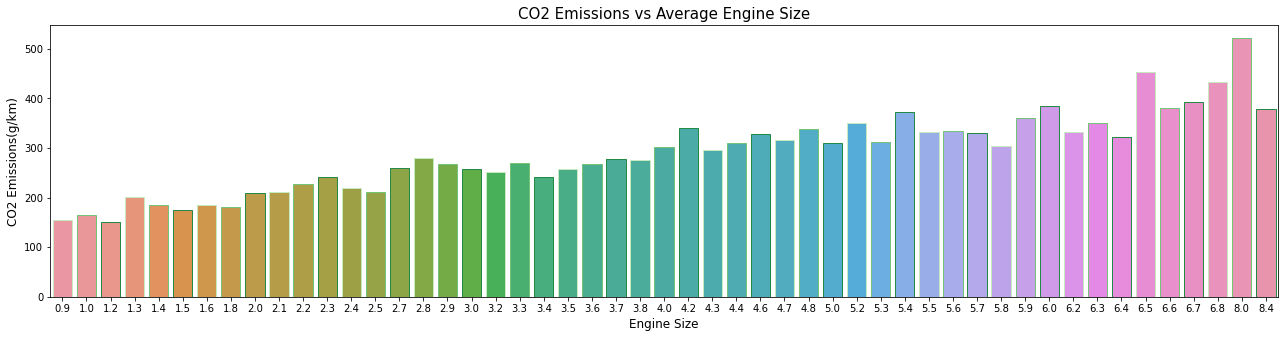

In [22]:
CO2_engine = df.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Engine Size(L)",y="CO2 Emissions(g/km)",data = CO2_engine, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions vs Average Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0.5, 1.0, 'CO2 Emissions vs Engine Size')

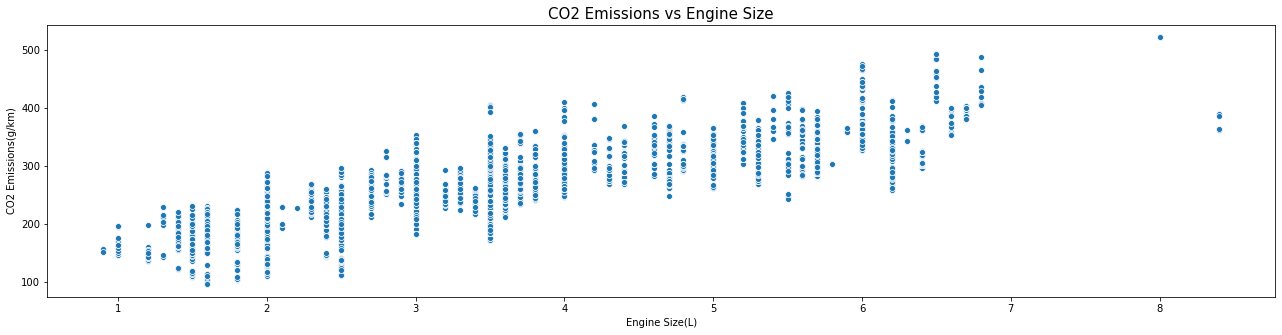

In [23]:
plt.figure(figsize=(22,5))
sns.scatterplot(df['Engine Size(L)'],df['CO2 Emissions(g/km)'])
plt.title('CO2 Emissions vs Engine Size', fontsize=15)

We can see that as engine size increases CO2 emissions are also rising. They are directly proportional variables. But it looks like the datapoints when the engine size bigger than 8L are outliers. We will remove them from the data set.

Text(0.5, 1.0, 'CO2 Emissions vs Engine Size')

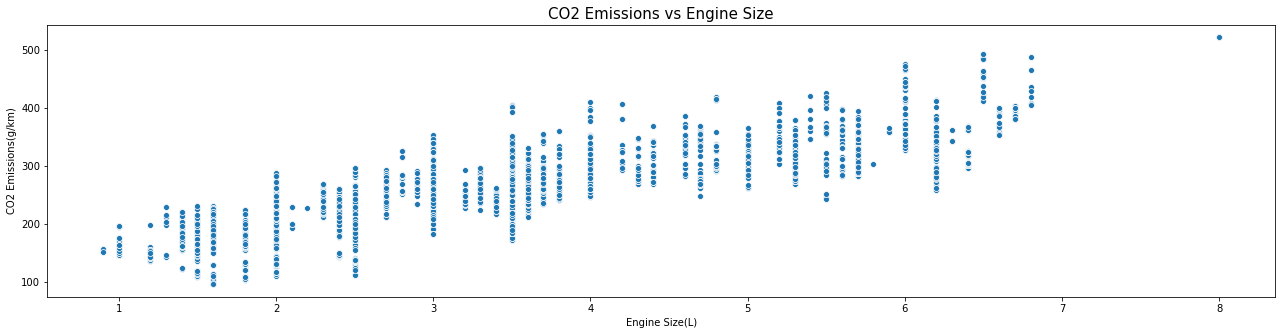

In [24]:
df.drop(df.loc[df['Engine Size(L)']>8].index, inplace=True) 
plt.figure(figsize=(22,5))
sns.scatterplot(df['Engine Size(L)'],df['CO2 Emissions(g/km)'])
plt.title('CO2 Emissions vs Engine Size', fontsize=15)

### Is there any relationship between cylinders and CO2 emission?

Text(0, 0.5, 'CO2 Emissions(g/km)')

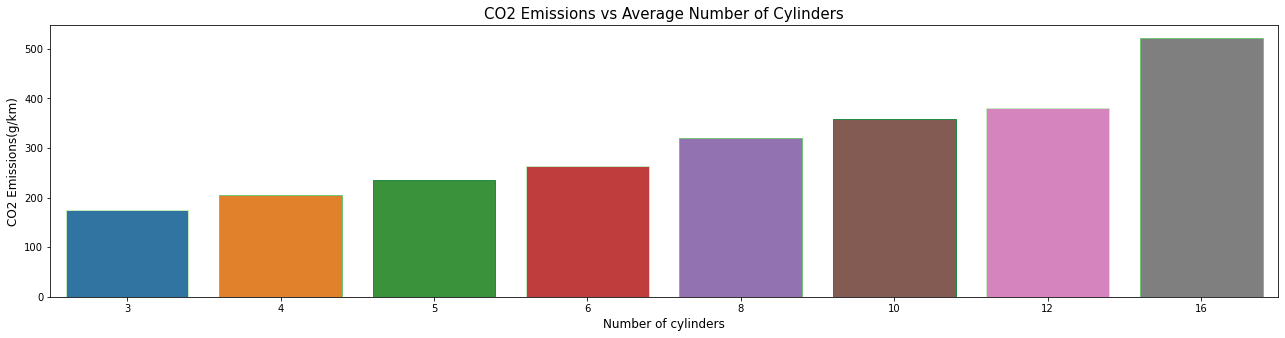

In [25]:
CO2_engine = df.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)",data = CO2_engine, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions vs Average Number of Cylinders', fontsize=15)
plt.xlabel('Number of cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0.5, 1.0, 'CO2 Emissions vs number of cylinders')

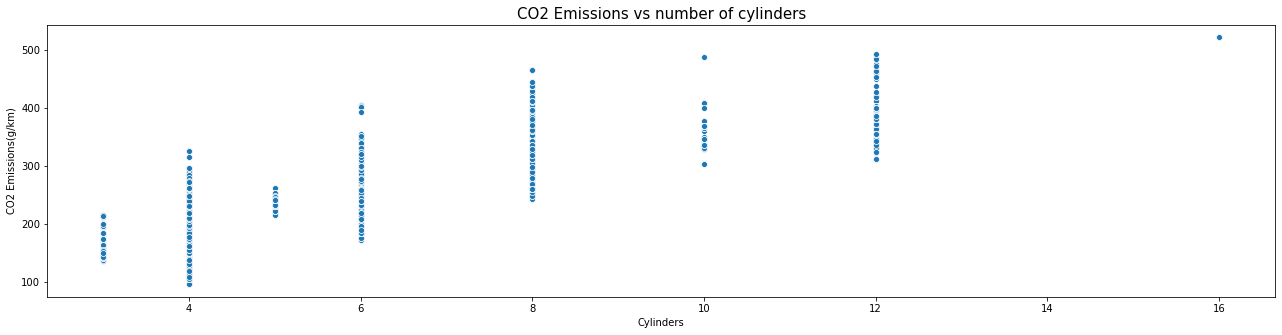

In [26]:
plt.figure(figsize=(22,5))
sns.scatterplot(df['Cylinders'],df['CO2 Emissions(g/km)'])
plt.title('CO2 Emissions vs number of cylinders', fontsize=15)

We can see that with the increase in the number of Cylinders, CO2 emissions also increase proportionally.

### Is there any relationship between fuel consumption and CO2 emissions?
We assume that fuel consumption affect CO2 emissions. Let's see about that.

Text(0, 0.5, 'CO2 Emissions(g/km)')

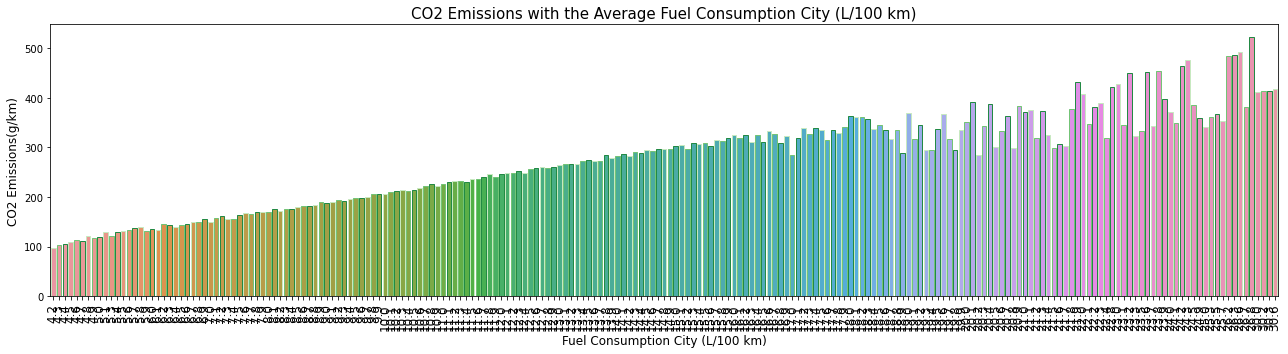

In [27]:
CO2_city = df.groupby(['Fuel Consumption City (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_city, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions with the Average Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0.5, 1.0, 'CO2 Emissions vs Fuel Consumption City (L/100 km) with different Fuel Type')

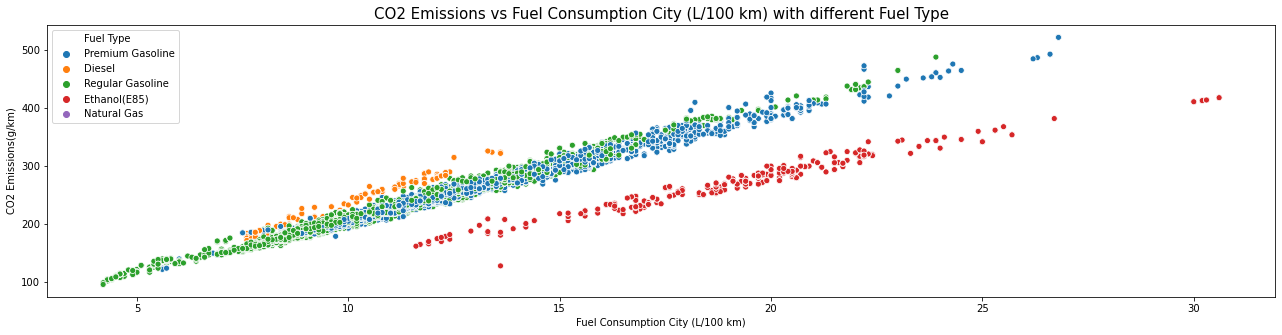

In [28]:
plt.figure(figsize=(22,5))
sns.scatterplot(df['Fuel Consumption City (L/100 km)'],df['CO2 Emissions(g/km)'],hue=df['Fuel Type'])
plt.title('CO2 Emissions vs Fuel Consumption City (L/100 km) with different Fuel Type', fontsize=15)

Text(0, 0.5, 'CO2 Emissions(g/km)')

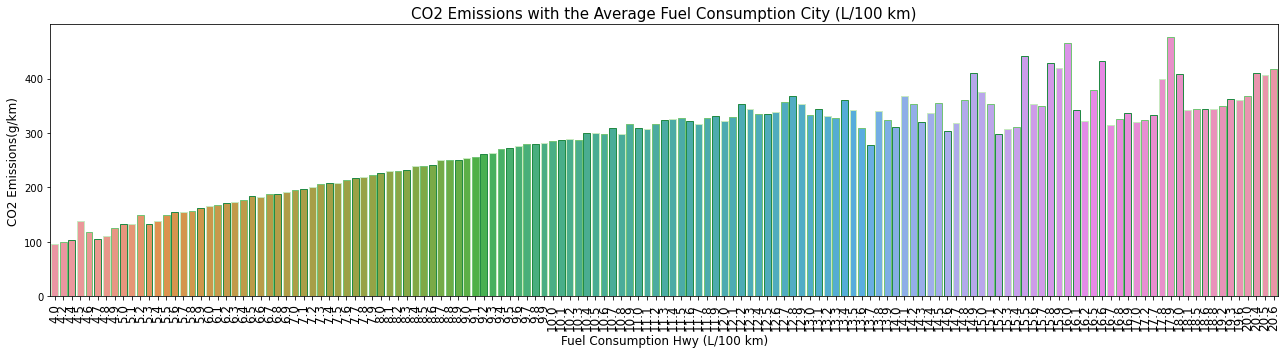

In [29]:
CO2_hwy = df.groupby(['Fuel Consumption Hwy (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_hwy, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions with the Average Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0.5, 1.0, 'CO2 Emissions vs Fuel Consumption Hwy (L/100 km) with different Fuel Type')

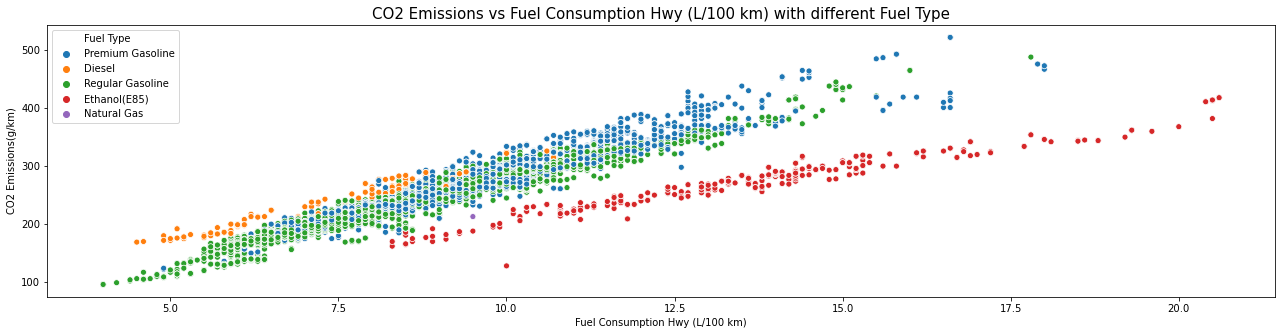

In [30]:
plt.figure(figsize=(22,5))
sns.scatterplot(df['Fuel Consumption Hwy (L/100 km)'],df['CO2 Emissions(g/km)'],hue=df['Fuel Type'])
plt.title('CO2 Emissions vs Fuel Consumption Hwy (L/100 km) with different Fuel Type', fontsize=15)

Text(0, 0.5, 'CO2 Emissions(g/km)')

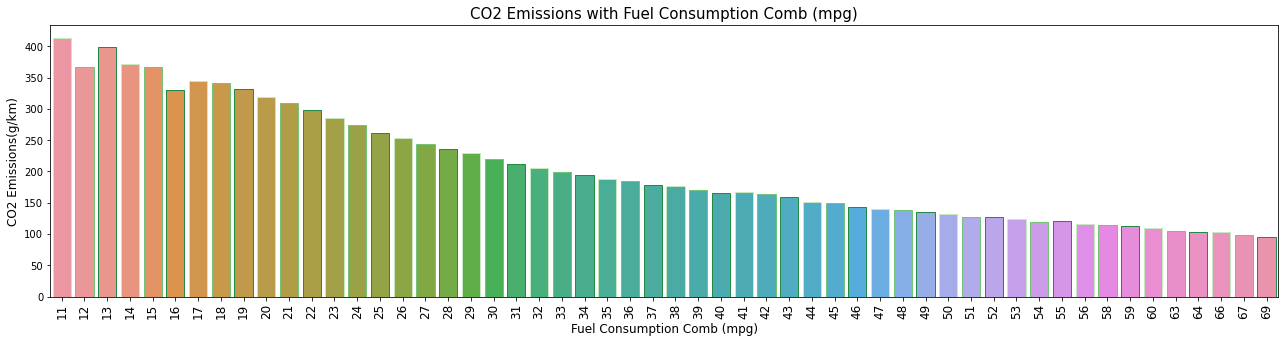

In [31]:
CO2_comb_mpg = df.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(22,5))
sns.barplot(x = "Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)",data = CO2_comb_mpg, edgecolor=sns.color_palette("Greens", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0.5, 1.0, 'CO2 Emissions vs Fuel Consumption Comb (mpg) with different Fuel Type')

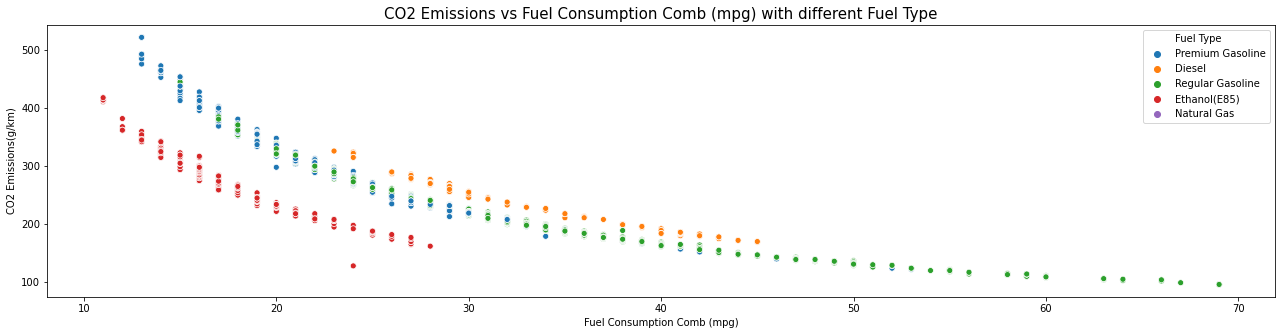

In [32]:
plt.figure(figsize=(22,5))
sns.scatterplot(df['Fuel Consumption Comb (mpg)'],df['CO2 Emissions(g/km)'],hue=df['Fuel Type'])
plt.title('CO2 Emissions vs Fuel Consumption Comb (mpg) with different Fuel Type', fontsize=15)

From the above plots, we can observe that the fuel consumtion of vehicles on city roads increases carbon emissions also increase, the same trend can be observed in fuel consumption on highway, they are highly positively correlated. 

However, CO2 Emission and Fuel Consumption Comb (mpg) are strongly negatively correlated as Fuel Consumption Comb (mpg) decreases, CO2 emissios increases. The Fuel Consumption Comb (mpg) shows how many miles a car can travel with one gallon of fuel, so less mile per gallon represents more fuel consumption. It is logical to have negative correlation with CO2 emissions.

### Looking at the correlation between numerical features

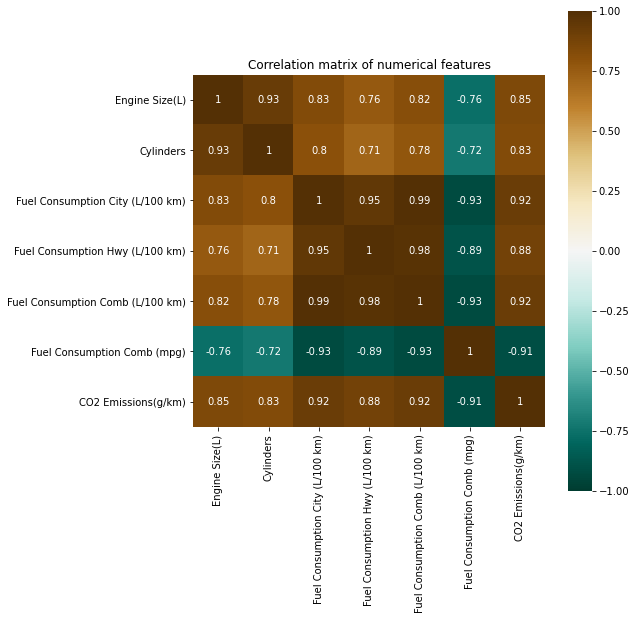

In [33]:
corr = df.corr()
# visualizing correlation with heatmap
plt.subplots(figsize=(9,9));
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, cmap="BrBG_r", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

From the above correlation plot, we can see all the features are positively correlated with CO2 emissions except Fuel Consumption Comb (mpg) which is negatively correlated with CO2 emissions.

Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 respectively with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant. It shows that Fuel Consumption Comb (L/100 km) is redundant feature and we can drop this column from the data set.

### Handling categorical data

In [34]:
# change categorial data of Transmission into dummy or binary values
transmission = pd.get_dummies(df['Transmission']) # to get the dummy values and store in a variable called transmission
df = df.join(transmission) # add the dummy values to new columns

df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Automated Manual,Automatic,Automatic with Select Shift,Continuously Variable,Manual
0,ACURA,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196,0,0,1,0,0
1,ACURA,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221,0,0,0,0,1
2,ACURA,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136,0,0,0,1,0
3,ACURA,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255,0,0,1,0,0
4,ACURA,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244,0,0,1,0,0


In [35]:
# change categorial data of Fuel Type into dummy or binary values
fuel_type = pd.get_dummies(df['Fuel Type']) # to get the dummy values and store in a variable called fuel_type
df = df.join(fuel_type) # add the dummy values to new columns

df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),...,Automated Manual,Automatic,Automatic with Select Shift,Continuously Variable,Manual,Diesel,Ethanol(E85),Natural Gas,Premium Gasoline,Regular Gasoline
0,ACURA,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,...,0,0,1,0,0,0,0,0,1,0
1,ACURA,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,...,0,0,0,0,1,0,0,0,1,0
2,ACURA,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,...,0,0,0,1,0,0,0,0,1,0
3,ACURA,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,...,0,0,1,0,0,0,0,0,1,0
4,ACURA,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,...,0,0,1,0,0,0,0,0,1,0


#### Drop unused columns

In [36]:
# drop Make column
df.drop('Make', axis='columns', inplace=True) 

# drop Vehicle Class column
df.drop('Vehicle Class', axis='columns', inplace=True) 

# drop Transmission column
df.drop('Transmission', axis='columns', inplace=True)

# drop Fuel Type column
df.drop('Fuel Type', axis='columns', inplace=True) 

# drop Fuel Consumption Comb (L/100 km) column
df.drop('Fuel Consumption Comb (L/100 km)', axis='columns', inplace=True)

# drop Natural Gas column
df.drop('Natural Gas', axis='columns', inplace=True) 

df.reset_index(drop=True, inplace=True)

In [37]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Automated Manual,Automatic,Automatic with Select Shift,Continuously Variable,Manual,Diesel,Ethanol(E85),Premium Gasoline,Regular Gasoline
0,2.0,4,9.9,6.7,33,196,0,0,1,0,0,0,0,1,0
1,2.4,4,11.2,7.7,29,221,0,0,0,0,1,0,0,1,0
2,1.5,4,6.0,5.8,48,136,0,0,0,1,0,0,0,1,0
3,3.5,6,12.7,9.1,25,255,0,0,1,0,0,0,0,1,0
4,3.5,6,12.1,8.7,27,244,0,0,1,0,0,0,0,1,0


## Saving the dataframe/cleaned dataset into 'CO2 Emissions_Canada Cleaned data.csv'

In [38]:
df.to_csv('CO2 Emissions_Canada Cleaned data.csv', index=False) 

# Developing a Simple Linear Regression Model

## Shuffle and Split the dataset into training and test sets
I will split 75:25 and using randomstate=42 to make a repeatable result. 

In [39]:
# first let divide the df into features and response
Y = df['CO2 Emissions(g/km)']
X = df.drop('CO2 Emissions(g/km)', axis=1)

0       196
1       221
2       136
3       255
4       244
       ... 
7375    219
7376    232
7377    240
7378    232
7379    248
Name: CO2 Emissions(g/km), Length: 7380, dtype: int64

In [40]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


## Training and Testing

In [41]:
# build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
# get the predictions for the test dataset
predictions = model.predict(X_test)

## Calculate the performance metric

In [43]:
# R-squared
r2 = model.score(X_test, Y_test)
print("R-squared is ", r2)

R-squared is  0.9914583397129912


In [44]:
# RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions)

print('RMSE is ', mse**0.5)

RMSE is  5.337670860136388


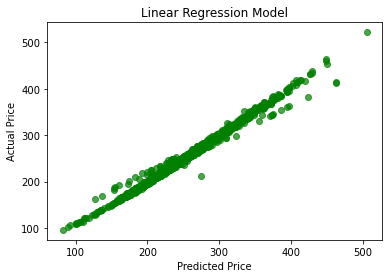

In [45]:
# plot the prediction vs actual
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=.7, color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#plt.savefig('simple linear regression.png', dpi=400, bbox_inches='tight')
plt.show()

In [46]:
# the coefficient list
feat = list(X_train.columns)
coef = model.coef_.transpose()
coef_table = np.vstack((feat, coef)).T
df = pd.DataFrame(coef_table, columns=['Feature', 'Coefficients'])
df

,Feature,Coefficients
0,Engine Size(L),0.2588324642918574
1,Cylinders,1.0618276459539309
2,Fuel Consumption City (L/100 km),10.898939771875607
3,Fuel Consumption Hwy (L/100 km),9.245883431459735
4,Fuel Consumption Comb (mpg),-0.8437664855569136
5,Automated Manual,0.8651826387795947
6,Automatic,-0.2887318107860952
7,Automatic with Select Shift,-0.09596444519224401
8,Continuously Variable,-0.06839929760285257
9,Manual,-0.412087085198411


# Linear Regression Model with Ridge Regression

The Ridge() function has an alpha argument that is used to tune the model. I will generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [47]:
from sklearn.linear_model import Ridge
alphas = 10**np.linspace(5, -2, 10)
alphas

array([1.00000000e+05, 1.66810054e+04, 2.78255940e+03, 4.64158883e+02,
       7.74263683e+01, 1.29154967e+01, 2.15443469e+00, 3.59381366e-01,
       5.99484250e-02, 1.00000000e-02])

Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix coefs. We'll want to standardize the variables so that they are on the same scale. To do this, we can use the normalize = True parameter:

In [48]:
ridge = Ridge(normalize = False)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(10, 14)

We can see the weight of each parameter based on the alpha values in the plot as shown below

Text(0, 0.5, 'weights')

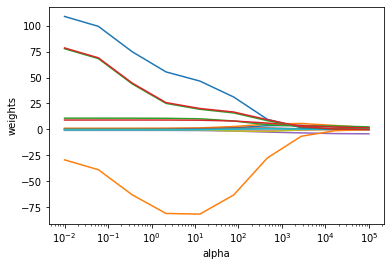

In [49]:
plt.plot(alphas, coefs)
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
#plt.savefig('weight alpha values.png', dpi=400, bbox_inches='tight')

In [50]:
rmse_list = []
r2_list = []
for a in alphas:
    ridge = Ridge(alpha = a, normalize = False, max_iter=1000)
    ridge.fit(X_train, Y_train)             # Fit a ridge regression on the training data
    pred = ridge.predict(X_test)           # Use this model to predict the test data
    #print(pd.Series(ridge.coef_, index = x.columns)) # Print coefficients
    
    r2_list.append(ridge.score(X, Y))
    rmse = mean_squared_error(Y_test, pred)**0.5;
    rmse_list.append(rmse)
    print("RMSE ", rmse)          # Calculate the test MSE

ridge_result = np.vstack((alphas, rmse_list, r2_list)).T
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', "R2"])
ridge_df

RMSE  23.485803501272667
RMSE  19.54484851698706
RMSE  17.634357205277425
RMSE  14.110248701759243
RMSE  7.912186295741444
RMSE  5.399262111419268
RMSE  5.3138157536936825
RMSE  5.332546466605437
RMSE  5.336783261874265
RMSE  5.33752188288055


,Alpha,RMSE,R2
0,100000.000000,23.485804,0.838346
1,16681.005372,19.544849,0.891296
2,2782.559402,17.634357,0.912240
3,464.158883,14.110249,0.943878
4,77.426368,7.912186,0.982209
5,12.915497,5.399262,0.992096
6,2.154435,5.313816,0.992620
7,0.359381,5.332546,0.992620
8,0.059948,5.336783,0.992617
9,0.010000,5.337522,0.992617


In [51]:
ridge = Ridge(alpha = 0.01, normalize = False)
ridge.fit(X_train, Y_train)             # Fit a ridge regression on the training data
pred = ridge.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge.coef_, index = X.columns)) # Print coefficients

Engine Size(L)                       0.259191
Cylinders                            1.062250
Fuel Consumption City (L/100 km)    10.898263
Fuel Consumption Hwy (L/100 km)      9.245662
Fuel Consumption Comb (mpg)         -0.843921
Automated Manual                     0.865350
Automatic                           -0.288778
Automatic with Select Shift         -0.095811
Continuously Variable               -0.068842
Manual                              -0.411919
Diesel                              50.394118
Ethanol(E85)                       -89.089980
Premium Gasoline                    18.971605
Regular Gasoline                    19.724258
dtype: float64


In [59]:
testdat = [[2, 4, 9.9, 6.7, 33, 0, 0, 1, 0, 0, 0, 0, 1, 0],[3.5, 6, 12.7, 9.1, 25, 0, 0, 1, 0, 0, 0, 0, 1, 0]]

In [64]:
y_prediksi = model.predict(testdat)

In [65]:
y_prediksi

array([197.65789114, 259.62707861])